In [265]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt       # Data Visualisation
import torch

In [266]:
#Temperature prediction example data
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [267]:
#Defining the model as per the given equation
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

In [268]:
#Mean Squared Error (MSE) calculation
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [269]:
#80% (training) and 20% (validation) split
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [270]:
#For efficient training shuffling the indices of the original dataset
shuffled_indices = torch.randperm(n_samples)

In [271]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([ 7,  6,  8,  1,  5,  3,  9,  0, 10]) tensor([4, 2])


In [272]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [273]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [274]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [275]:
train_loss_list = []
val_loss_list = []
#epoch_list = []

In [276]:
#Definition of the training loop 
def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        
        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")
    
    #plt.plot(train_loss_list)
    #plt.xlabel('epoch')
    #plt.ylabel('train loss')
    #plt.title('Training Loss')
    #plt.show()
                  
    #plt.plot(val_loss_list)
    #plt.xlabel('epoch')
    #plt.ylabel('val loss')
    #plt.title('Validation Loss')
    #plt.show()
    
    return params

In [277]:
import torch.optim as optim   

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [278]:
t_un = 0.1 * t_u

In [279]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)   #Using the Adam optimizer

#Training for learning rate of 0.1
training_loop(
    n_epochs=5000,         # running the training for 5000 epochs
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.2131, Validation loss 651.4102
Epoch 500, Training loss 2.7567, Validation loss 2.9904
Epoch 1000, Training loss 2.4407, Validation loss 2.6902
Epoch 1500, Training loss 2.2175, Validation loss 2.4501
Epoch 2000, Training loss 2.1119, Validation loss 2.3066
Epoch 2500, Training loss 2.0787, Validation loss 2.2379
Epoch 3000, Training loss 2.0723, Validation loss 2.2106
Epoch 3500, Training loss 2.0716, Validation loss 2.2017
Epoch 4000, Training loss 2.0716, Validation loss 2.1996
Epoch 4500, Training loss 2.0716, Validation loss 2.1993
Epoch 5000, Training loss 2.0716, Validation loss 2.1992


tensor([  2.3805,   0.2904, -10.4208], requires_grad=True)

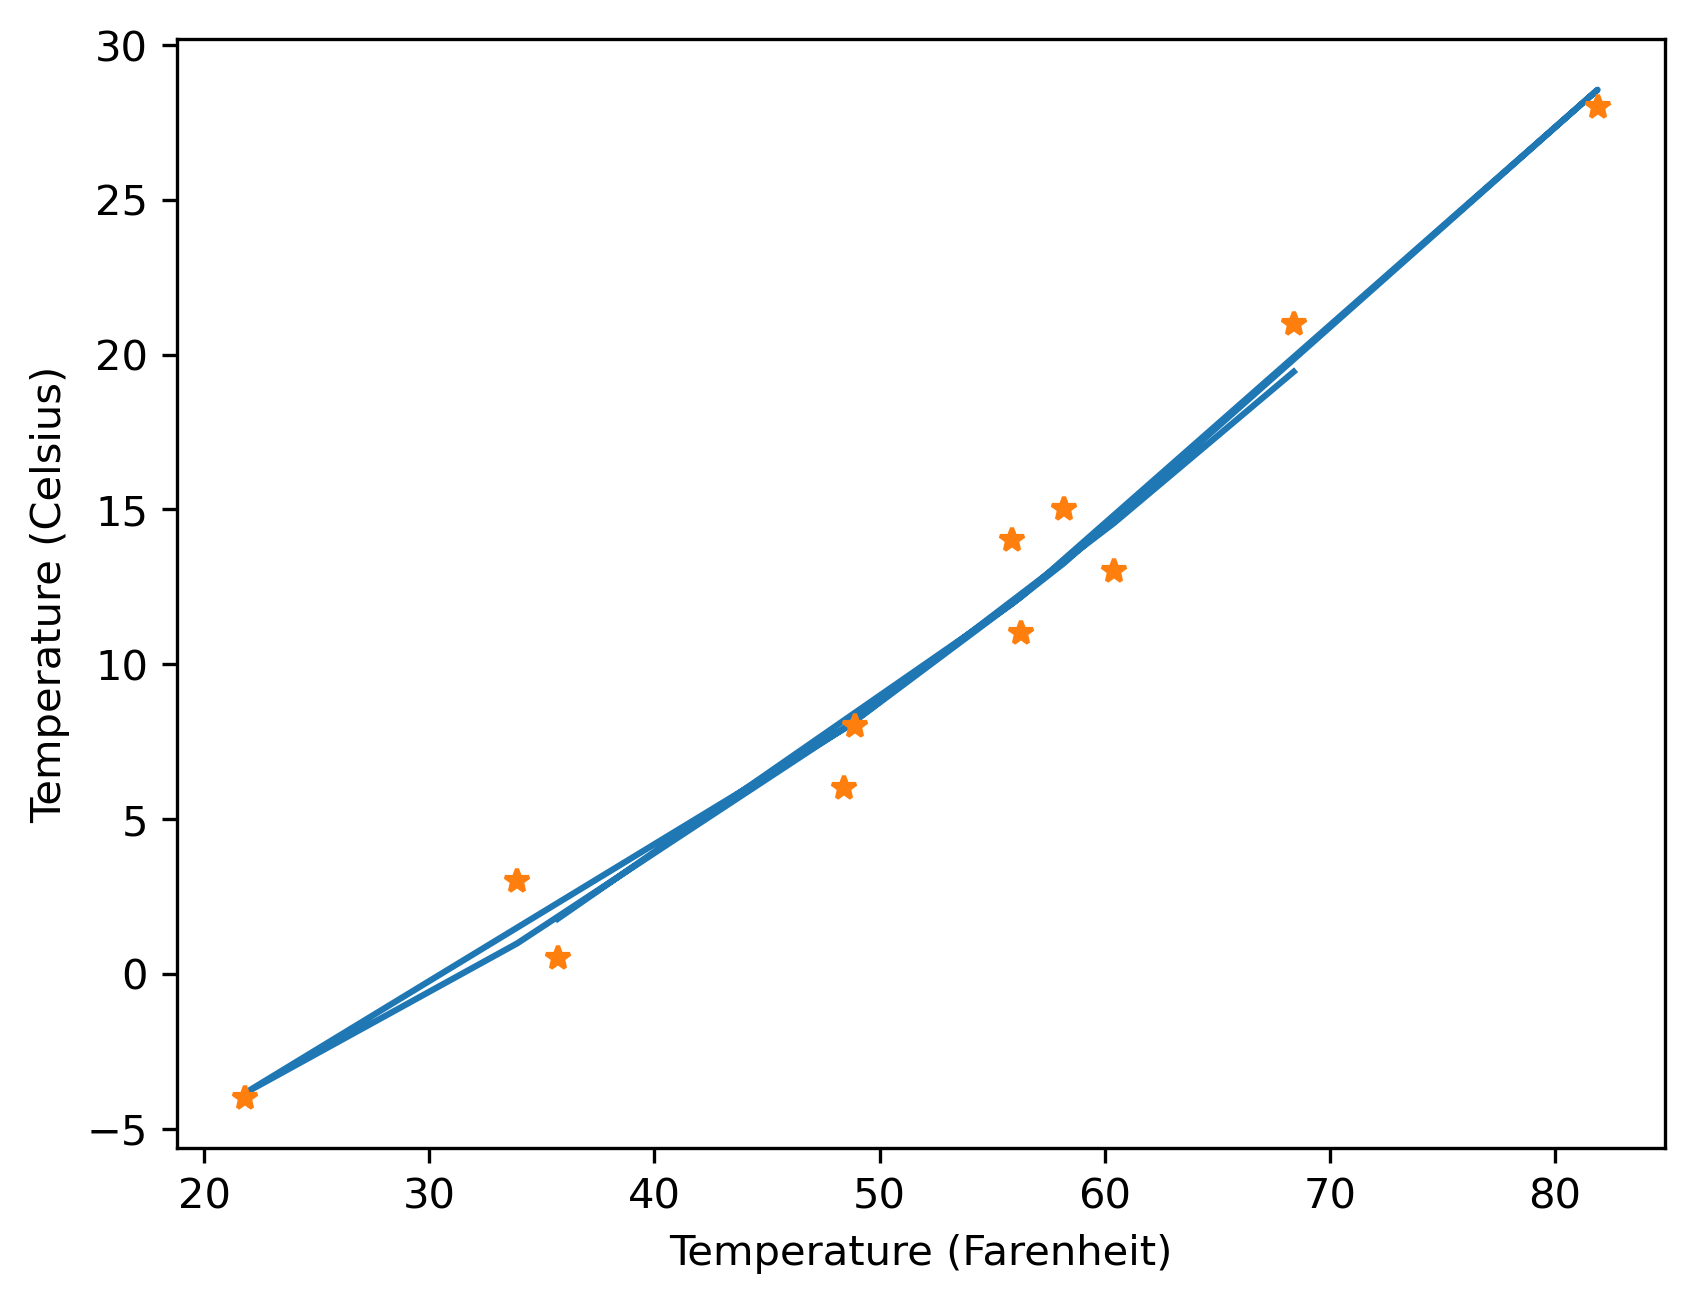

In [280]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '*')

In [281]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)    #Using the Adam optimizer

#Training for learning rate of 0.01
training_loop(
    n_epochs=5000,           # running the training for 5000 epochs
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.2131, Validation loss 651.4102
Epoch 500, Training loss 6.4891, Validation loss 2.4664
Epoch 1000, Training loss 3.8397, Validation loss 2.6777
Epoch 1500, Training loss 3.0561, Validation loss 2.9525
Epoch 2000, Training loss 2.9154, Validation loss 3.0746
Epoch 2500, Training loss 2.8578, Validation loss 3.0720
Epoch 3000, Training loss 2.7942, Validation loss 3.0215
Epoch 3500, Training loss 2.7193, Validation loss 2.9537
Epoch 4000, Training loss 2.6337, Validation loss 2.8745
Epoch 4500, Training loss 2.5399, Validation loss 2.7856
Epoch 5000, Training loss 2.4418, Validation loss 2.6897


tensor([ 0.5051,  0.4626, -5.8265], requires_grad=True)

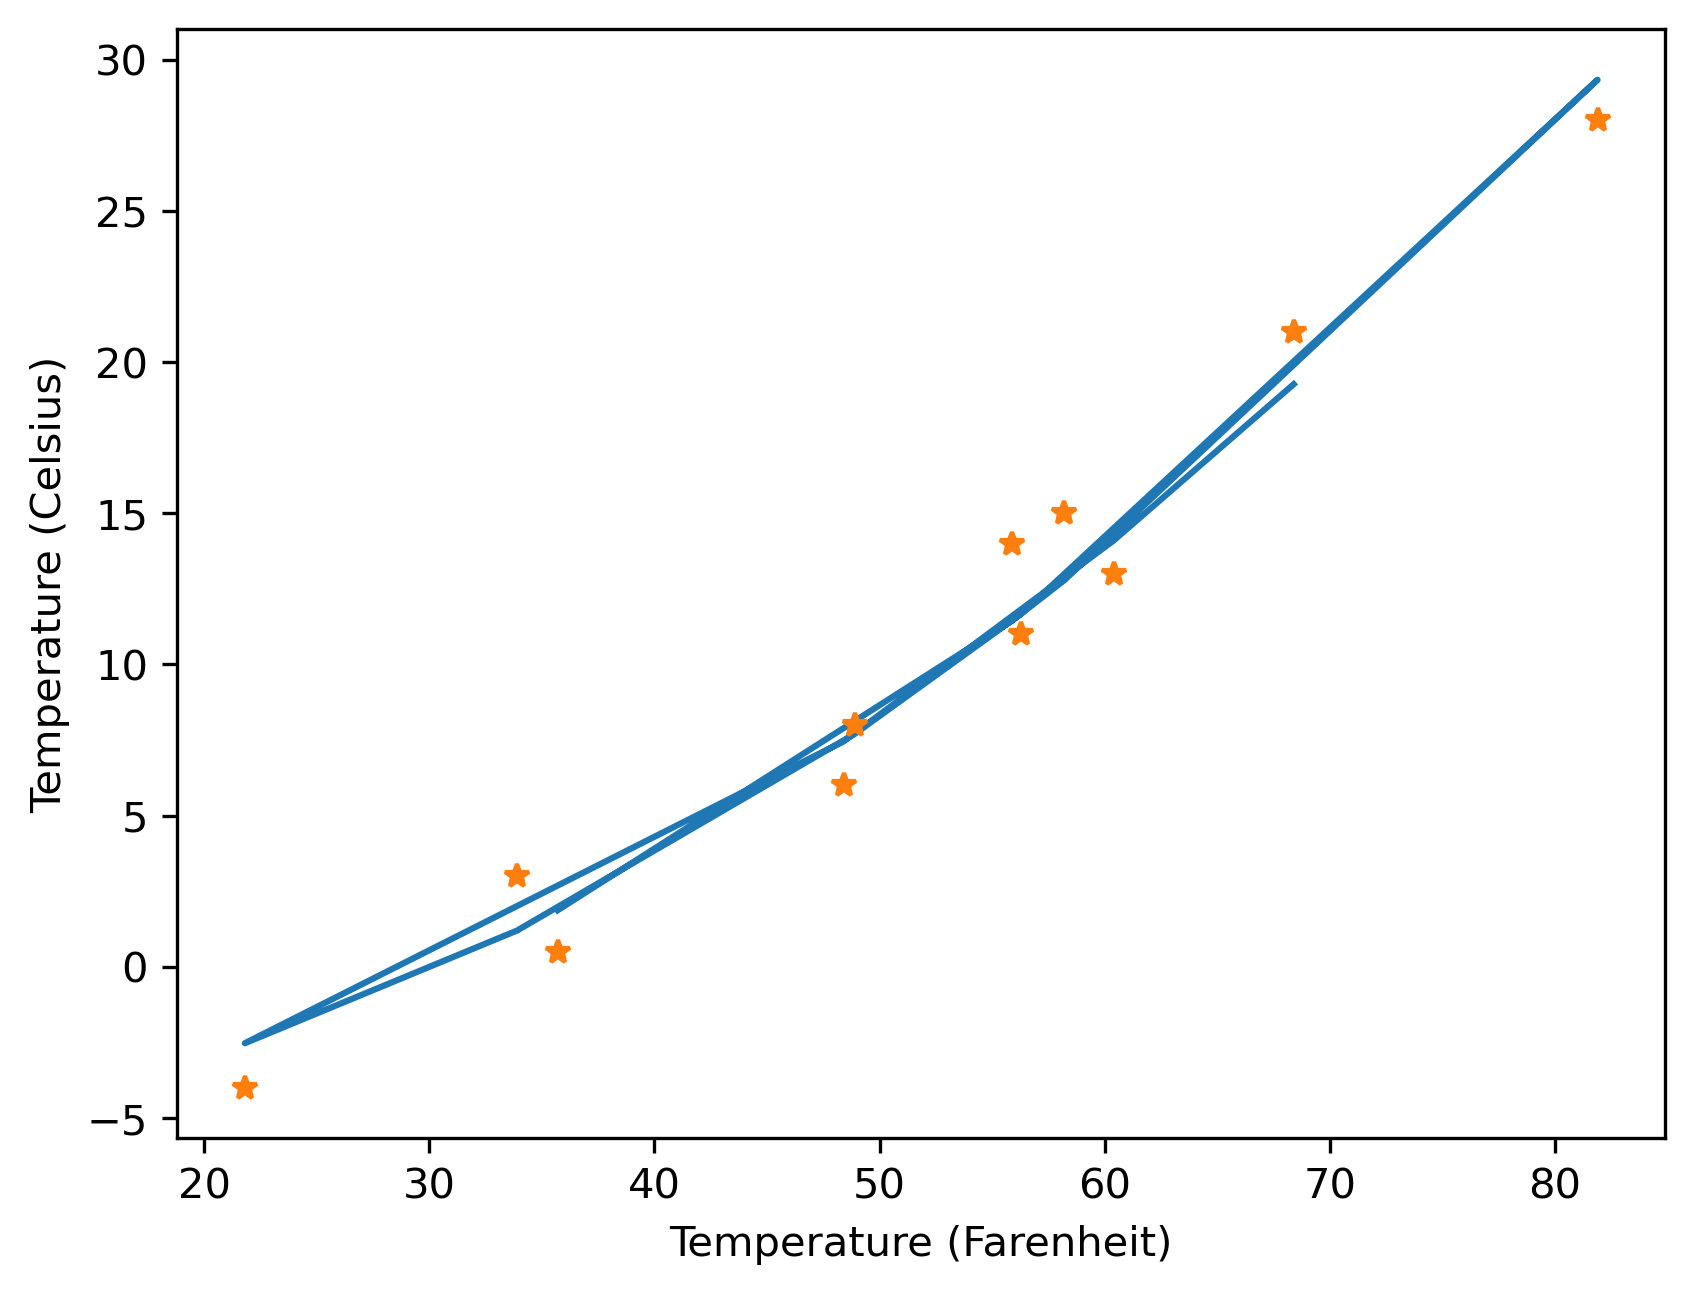

In [282]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '*')

In [283]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)    #Using the Adam optimizer

#Training for learning rate of 0.001
training_loop(
    n_epochs=5000,               # running the training for 5000 epochs
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.2131, Validation loss 651.4102
Epoch 500, Training loss 105.7747, Validation loss 94.6397
Epoch 1000, Training loss 14.3057, Validation loss 6.8643
Epoch 1500, Training loss 9.2002, Validation loss 2.4950
Epoch 2000, Training loss 8.6818, Validation loss 2.4703
Epoch 2500, Training loss 8.1225, Validation loss 2.4633
Epoch 3000, Training loss 7.4769, Validation loss 2.4580
Epoch 3500, Training loss 6.7665, Validation loss 2.4611
Epoch 4000, Training loss 6.0246, Validation loss 2.4773
Epoch 4500, Training loss 5.2944, Validation loss 2.5116
Epoch 5000, Training loss 4.6235, Validation loss 2.5678


tensor([-0.1184,  0.4598, -1.9294], requires_grad=True)

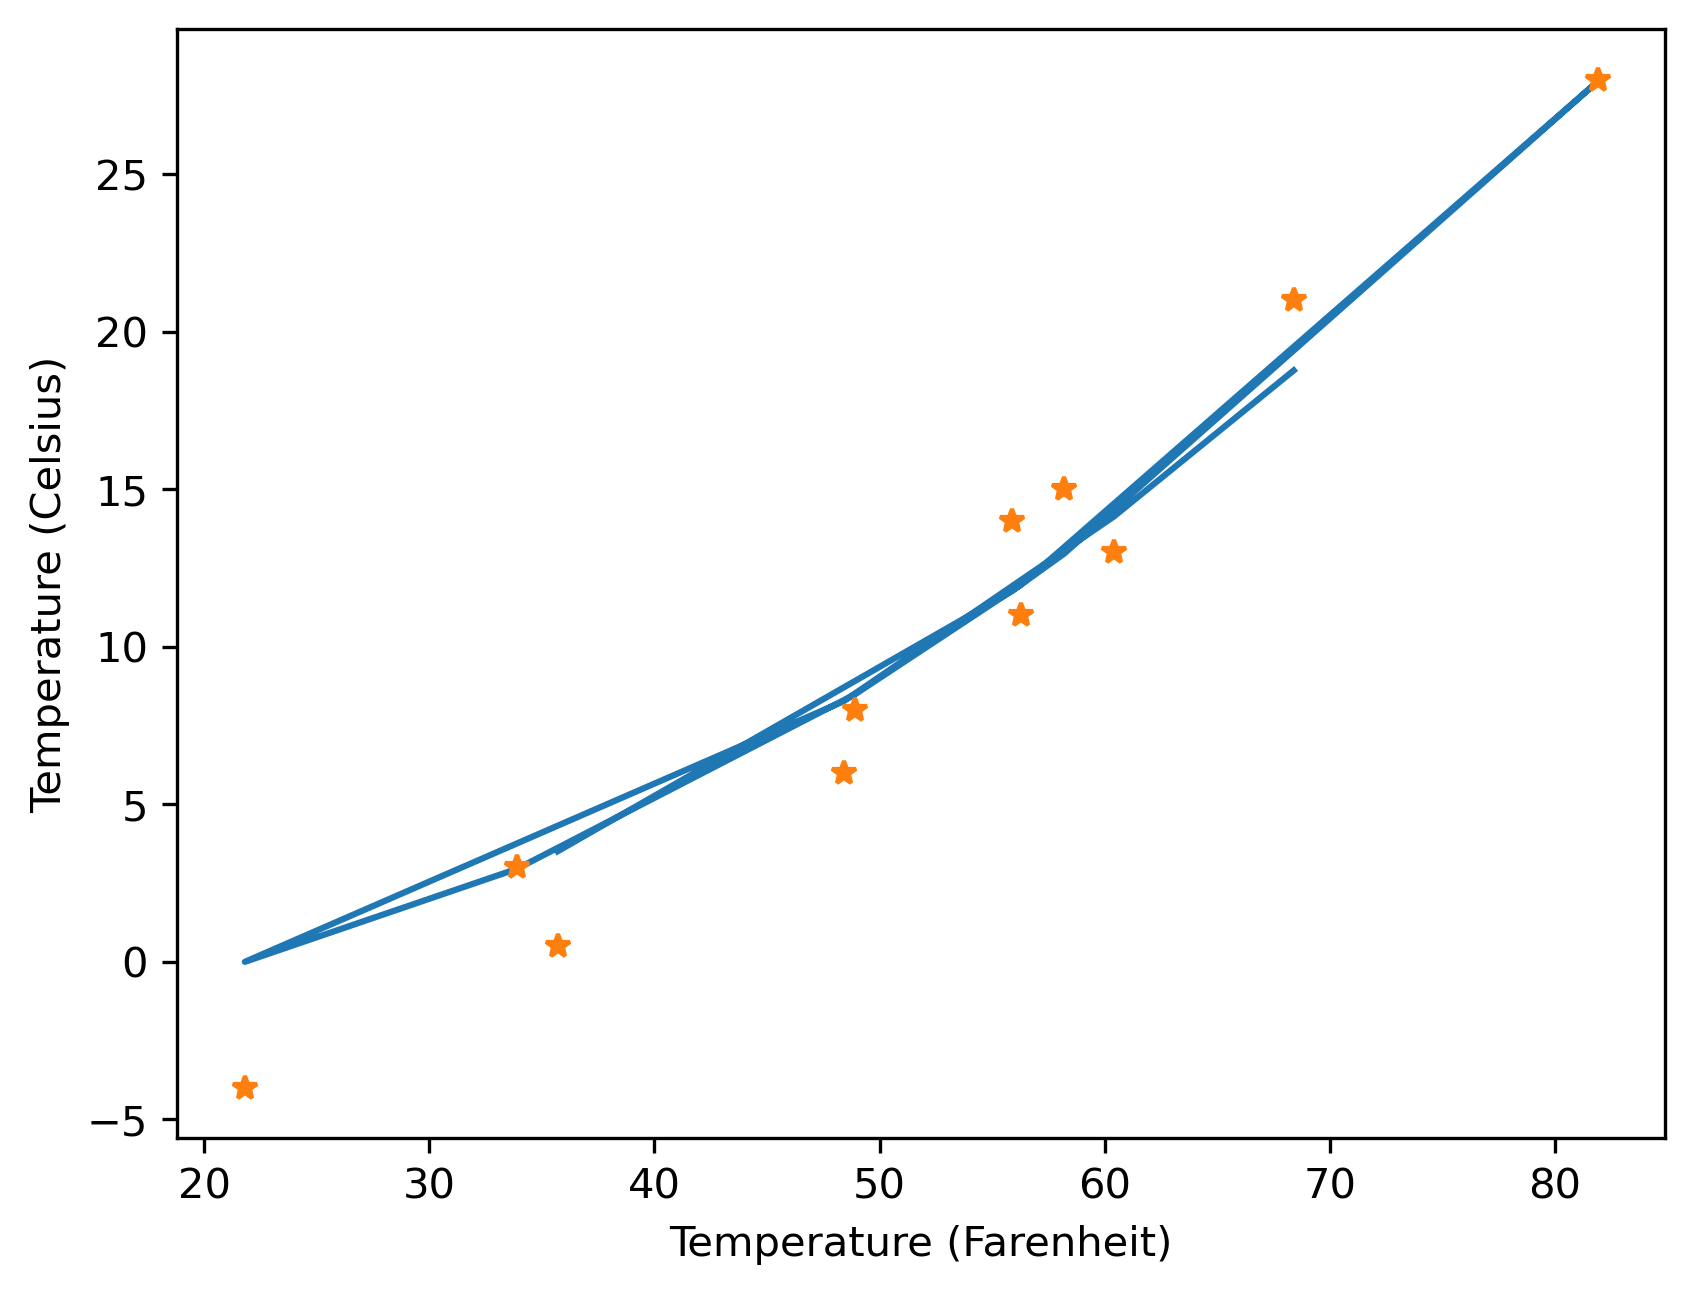

In [284]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '*')

In [285]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)    #Using the Adam optimizer

#Training for learning rate of 0.0001
training_loop(
    n_epochs=5000,                  # running the training for 5000 epochs
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.2131, Validation loss 651.4102
Epoch 500, Training loss 583.1073, Validation loss 556.4013
Epoch 1000, Training loss 495.5844, Validation loss 471.6566
Epoch 1500, Training loss 417.7606, Validation loss 396.3195
Epoch 2000, Training loss 348.7388, Validation loss 329.5200
Epoch 2500, Training loss 287.7881, Validation loss 270.5494
Epoch 3000, Training loss 234.3076, Validation loss 218.8250
Epoch 3500, Training loss 187.7944, Validation loss 173.8593
Epoch 4000, Training loss 147.8133, Validation loss 135.2299
Epoch 4500, Training loss 113.9663, Validation loss 102.5504
Epoch 5000, Training loss 85.8696, Validation loss 75.4482


tensor([ 0.5694,  0.5721, -0.4349], requires_grad=True)

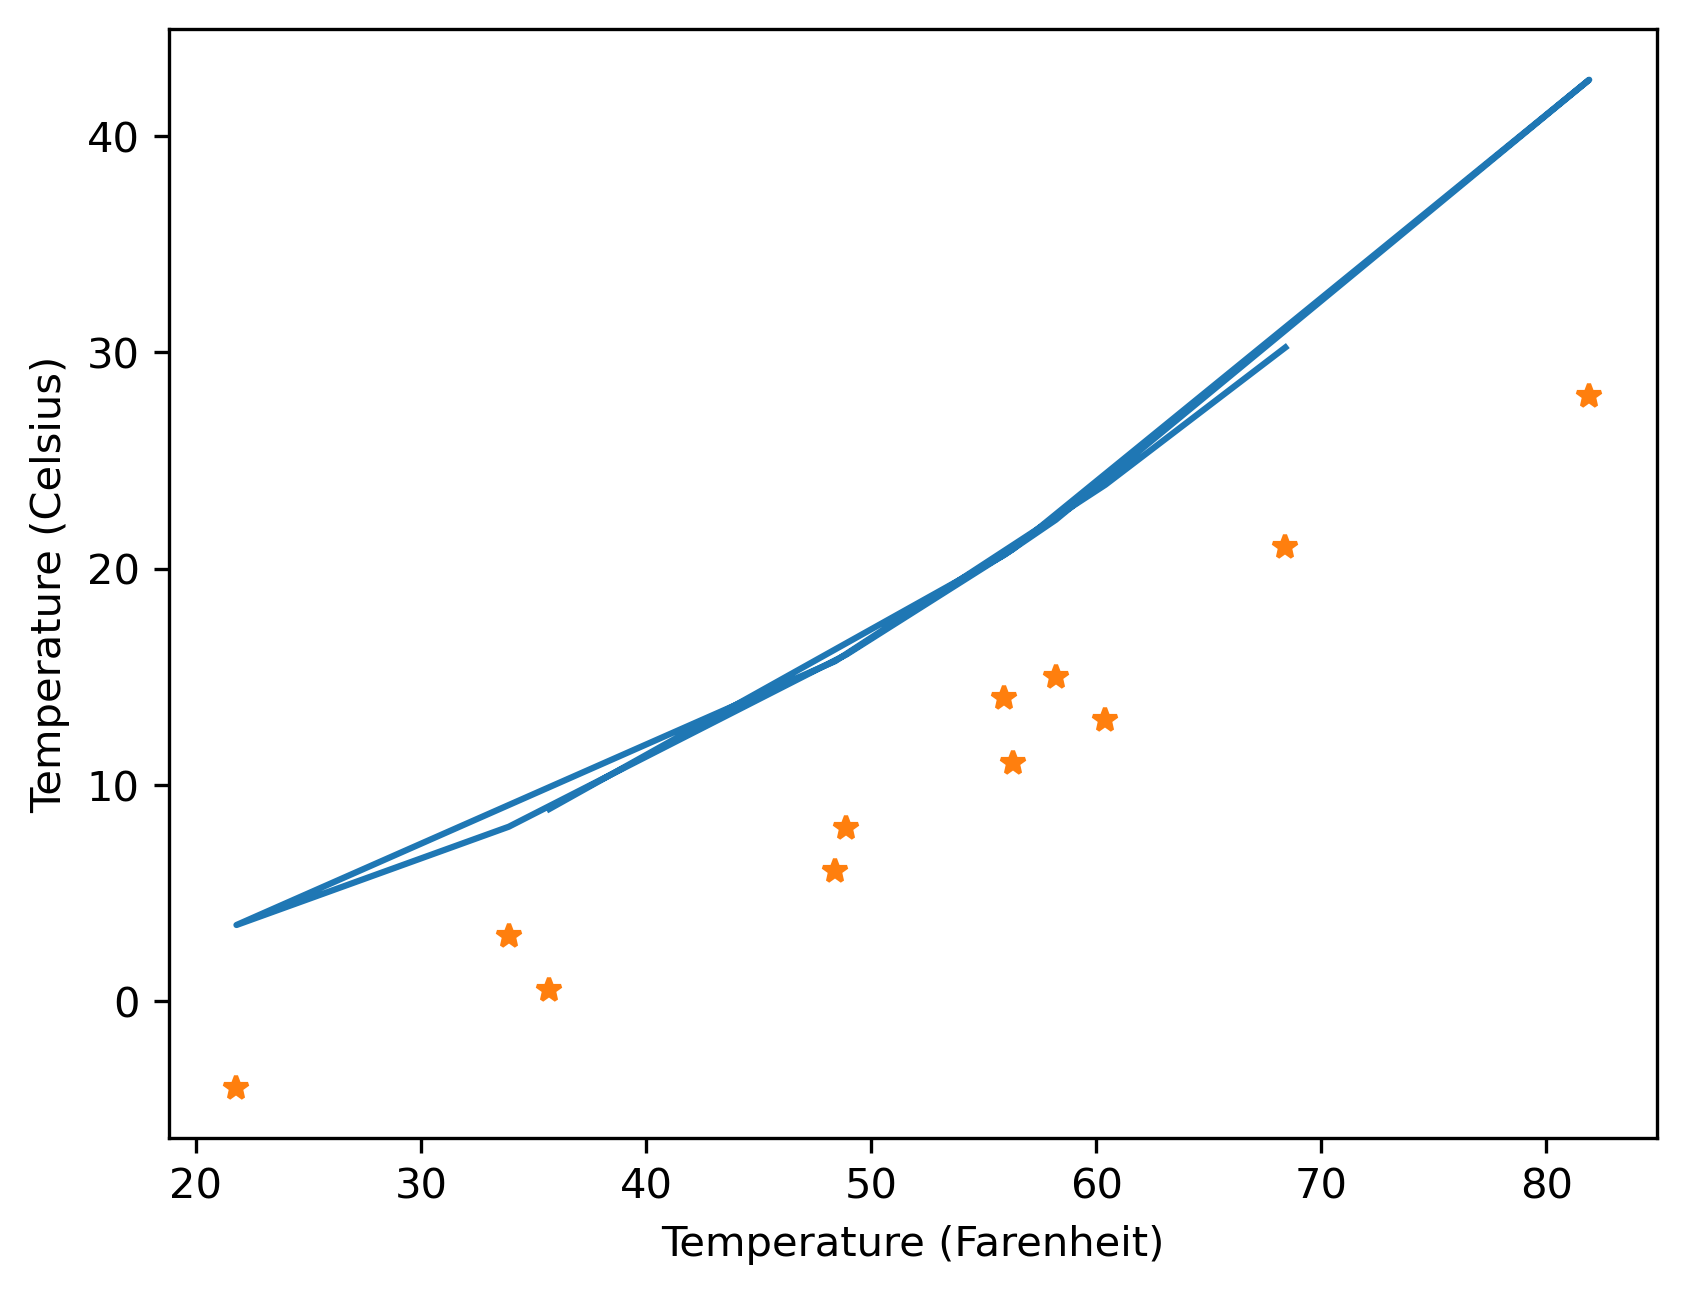

In [286]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '*')